In [1]:


# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score







In [2]:
df_auto = pd.read_csv('CarPrice_Assignment.csv')
df_auto = df_auto.drop('car_ID',axis=1)
df_auto.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [3]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [4]:
df_auto.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [5]:
# Extracting Car Company from the CarName as per direction in Problem 

df_auto['CarName'] = df_auto['CarName'].str.split(' ',expand=True)

In [6]:
# Renaming the typo errors in Car Company names

df_auto['CarName'] = df_auto['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [7]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

df_auto['symboling'] = df_auto['symboling'].astype(str)

<Figure size 1440x432 with 0 Axes>

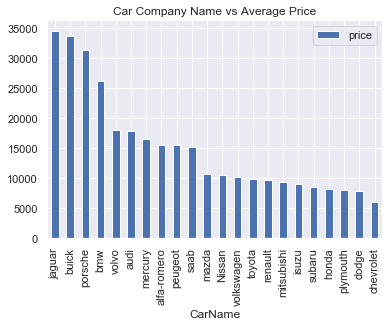

In [8]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df_auto.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [9]:
high_brand = df_autox[df_autox['price'] > 20000].index
low_brand = df_autox[df_autox['price'] < 12000].index
med_brand = df_autox[(df_autox['price'] <= 20000) & (df_autox['price'] >= 12000)].index

df_auto['brand_tier'] = ''

df_auto.loc[df_auto['CarName'].isin(high_brand), 'brand_tier'] = 'high'
df_auto.loc[df_auto['CarName'].isin(med_brand), 'brand_tier'] = 'med'
df_auto.loc[df_auto['CarName'].isin(low_brand), 'brand_tier'] = 'low'
df_auto['brand_tier'].value_counts()

low     142
med     39 
high    24 
Name: brand_tier, dtype: int64

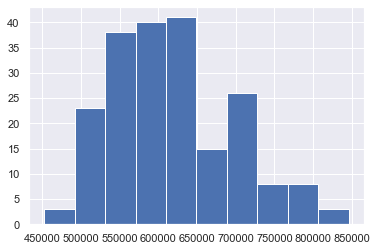

In [10]:
df_auto['carvolume'] = df_auto['carlength'] * df_auto['carwidth'] * df_auto['carheight']
df_auto['carvolume'].hist()

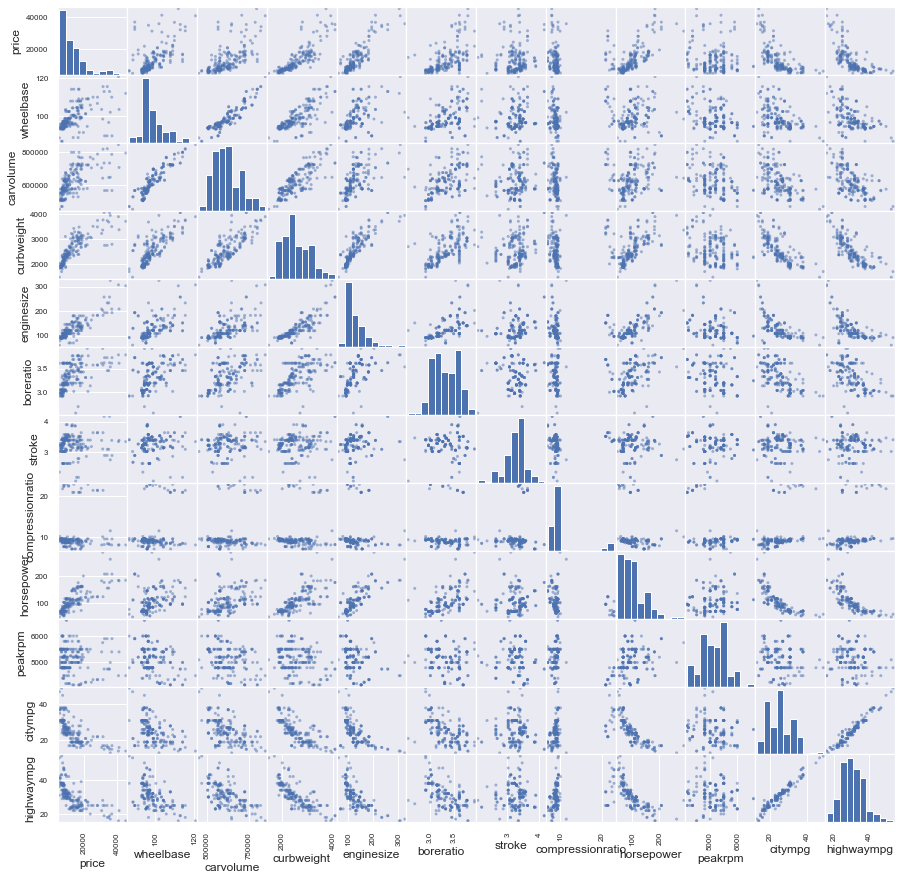

In [11]:
pd.plotting.scatter_matrix(df_auto[['price', 'wheelbase', 'carvolume', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']], figsize = (15, 15), diagonal = 'hist');

### Going to scale the data here, just going to start by standardizing

### Going to scale the data here, just going to start by standardizing

In [12]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_auto.select_dtypes(include=['object']).columns
num_col = df_auto.select_dtypes(exclude=['object']).columns
df_cat = df_auto[cat_col]
df_num = df_auto[num_col]

In [13]:
num_col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carvolume'],
      dtype='object')

In [14]:
scaler = preprocessing.StandardScaler()
df_std = df_auto.copy()
df_std[num_col] = scaler.fit_transform(df_std[num_col])

In [15]:
# save standardized dataframe for now 


# uncomment here to save
# df_std.to_csv('standardized_cardata.csv')
df_std.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand_tier,carvolume
0,3,alfa-romero,gas,std,two,convertible,rwd,front,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,dohc,four,0.0744,mpfi,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.0274,med,-1.1442
1,3,alfa-romero,gas,std,two,convertible,rwd,front,-1.6908,-0.4265,-0.8448,-2.0204,-0.0146,dohc,four,0.0744,mpfi,0.5191,-1.8394,-0.2883,0.1745,-0.2630,-0.6466,-0.5461,0.4045,med,-1.1442
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,-0.7086,-0.2315,-0.1906,-0.5435,0.5149,ohcv,six,0.6040,mpfi,-2.4049,0.6859,-0.2883,1.2645,-0.2630,-0.9530,-0.6916,0.4045,med,-0.3927
3,2,audi,gas,std,four,sedan,fwd,front,0.1737,0.2073,0.1365,0.2359,-0.4208,ohc,four,-0.4311,mpfi,-0.5173,0.4622,-0.0360,-0.0537,0.7879,-0.1869,-0.1094,0.0845,med,0.2031
4,2,audi,gas,std,four,sedan,4wd,front,0.1071,0.2073,0.2300,0.2359,0.5168,ohc,five,0.2189,mpfi,-0.5173,0.4622,-0.5407,0.2759,0.7879,-1.1062,-1.2739,0.5237,med,0.2273


### Some more viz and EDA 

In [16]:
len(num_col)

15

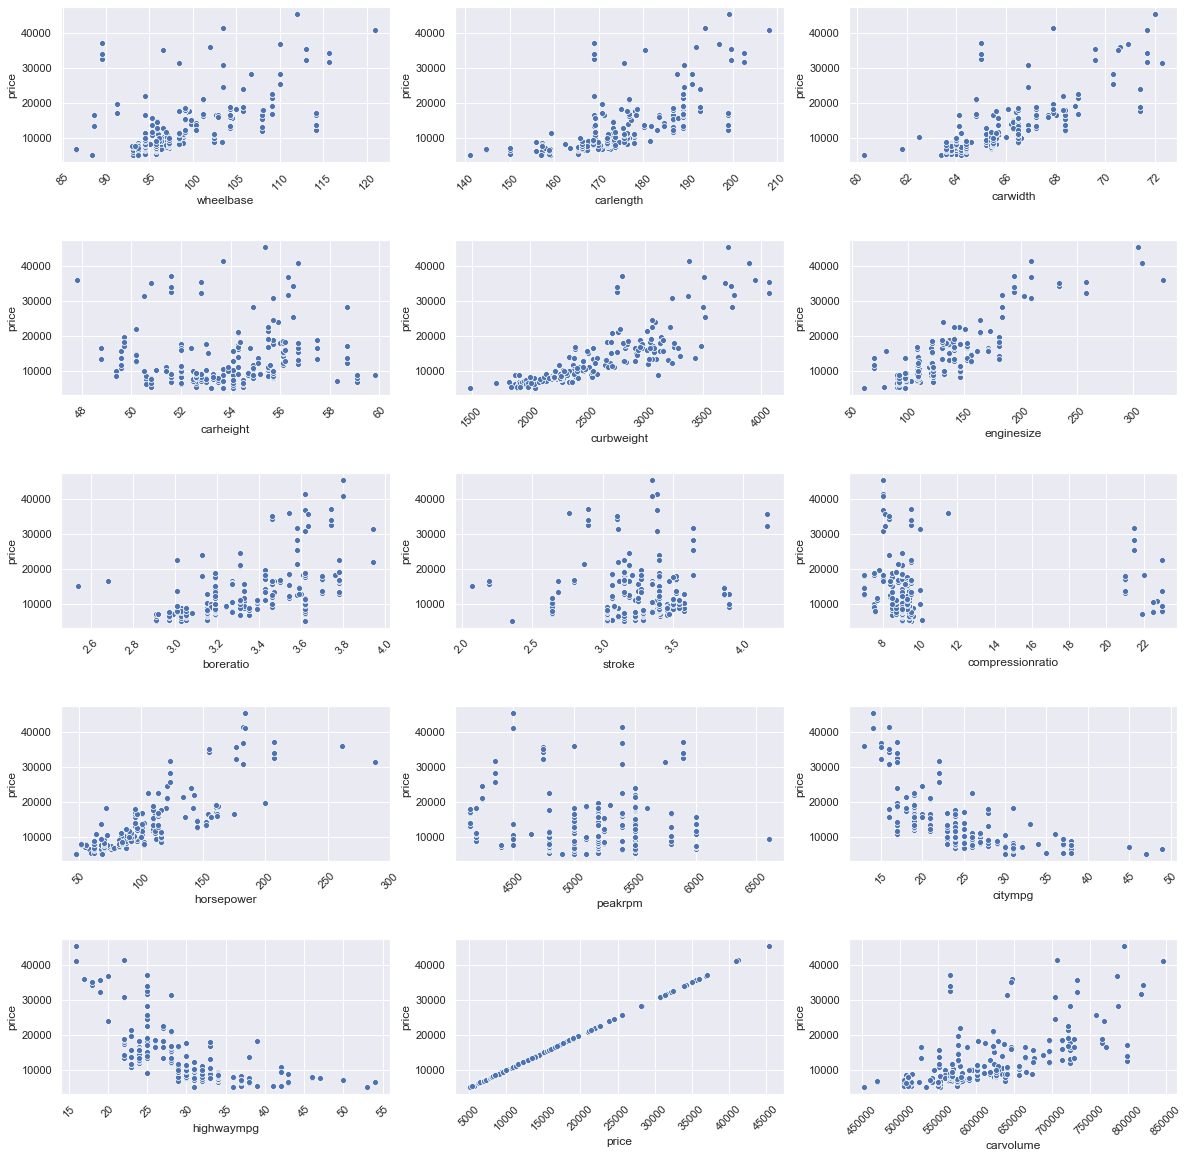

In [20]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(int(len(num_col)/3),3,figsize=(20,20)) # might need to add a +1 here to the len subplot if # of vars changes
for seg,col in enumerate(num_col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='price' ,data=df_auto, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)